# Analysis

## Set-up data for the experiments

In [1]:
import os
import pandas as pd


datamatrixDf = pd.read_csv(os.environ['MIMIC_EHR_PIPELINE_BASE'] + '''/data/sepsis_micro_cohort/final/data_matrix.csv''')
datamatrixDf

,person_id,visit_occurrence_id,measurement_date,visit_start_datetime_adm,death_datetime_adm,death_0_7_adm,death_0_14_adm,death_0_21_adm,death_0_30_adm,death_0_60_adm,...,labs_Prothrombin time (PT)_last,labs_INR in Platelet poor plasma by Coagulation assay_last,labs_aPTT in Blood by Coagulation assay_last,labs_Specific gravity of Urine by Test strip_last,labs_pH of Urine by Test strip_last,labs_Bilirubin.total in Serum or Plasma_last,labs_Aspartate aminotransferase in Serum or Plasma_last,labs_Alanine aminotransferase in Serum or Plasma_last,labs_Alkaline phosphatase in Serum or Plasma_last,labs_Albumin in Serum or Plasma_last
0,-1788739119,-2142878850,2159-05-24,2159-05-22 20:37:00,2159-09-18 00:00:00,0,0,0,0,0,...,15.9,1.5,32.500000,1.020300,6.620000,1.900000,38.000000,19.000000,154.000000,3.320500
1,-1788739119,-2142878850,2159-05-26,2159-05-22 20:37:00,2159-09-18 00:00:00,0,0,0,0,0,...,14.8,1.4,33.800000,1.016395,6.905000,2.328000,58.430000,43.331667,181.220000,2.836500
2,-1788739119,-2142878850,2159-05-27,2159-05-22 20:37:00,2159-09-18 00:00:00,0,0,0,0,0,...,12.5,1.1,35.900000,1.016577,6.820000,1.000000,27.000000,16.000000,151.000000,2.679500
3,-1788739119,-2142878850,2159-05-28,2159-05-22 20:37:00,2159-09-18 00:00:00,0,0,0,0,0,...,11.8,1.1,37.000000,1.015025,6.845000,2.486833,46.225000,67.945000,223.955000,2.695000
4,-1788739119,-2142878850,2159-05-29,2159-05-22 20:37:00,2159-09-18 00:00:00,0,0,0,0,0,...,12.2,1.1,40.841917,1.019545,6.675000,1.500000,54.995000,80.800000,240.260000,2.519500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5609,-195010687,2141255146,2126-08-24,2126-08-10 12:54:00,2134-04-12 00:25:00,0,0,0,0,0,...,13.7,1.2,24.900000,1.019160,6.675000,1.448000,76.670000,132.130000,212.636667,3.743500
5610,-195010687,2141255146,2126-08-25,2126-08-10 12:54:00,2134-04-12 00:25:00,0,0,0,0,0,...,14.1,1.2,25.600000,1.016830,6.614167,1.497500,79.383333,138.458333,199.287500,3.504500
5611,-939423329,2143021773,2169-04-05,2169-02-13 00:00:00,2169-07-04 01:17:00,0,0,0,0,0,...,16.3,1.5,29.200000,1.012567,5.750000,0.851500,27.248333,30.435000,161.455000,2.826667
5612,-939423329,2143021773,2169-04-06,2169-02-13 00:00:00,2169-07-04 01:17:00,0,0,0,0,0,...,14.6,1.4,32.000000,1.012815,5.782000,0.300000,10.000000,7.000000,50.000000,3.096500


In [4]:
import numpy as np


for sample in list(range(200, 800, 100)) + [len(datamatrixDf.visit_occurrence_id.unique())]:
    sampledDataMatrix = datamatrixDf[datamatrixDf.visit_occurrence_id.isin(np.random.choice(datamatrixDf.visit_occurrence_id.unique(), size=sample, replace=False))]
    sampledDataMatrix.to_csv(os.environ['MIMIC_EHR_PIPELINE_BASE'] + '/data/sepsis_micro_cohort/experiments/02_sample_size_analysis/datamatrix/data_matrix_sample_' + str(sample) + '.csv', index=False)
    print(sampledDataMatrix.shape, len(sampledDataMatrix.visit_occurrence_id.unique()))

(1445, 278) 200
(2337, 278) 300
(3083, 278) 400
(3994, 278) 500
(4660, 278) 600
(5414, 278) 700
(5614, 278) 729


## Run the analysis

In [4]:
import os


for sample in list(range(200, 800, 100)) + [729]:
        print('Sample Size: ' + str(sample))
        os.system(
            'cd ' + os.environ['EHR_ML_BASE'] + ';'
            +
            '''.venv/bin/python -m ehrml.predict_mortality.Evaluate ''' + os.environ['MIMIC_EHR_PIPELINE_BASE'] + '''/data/sepsis_micro_cohort/experiments/02_sample_size_analysis/datamatrix/data_matrix_sample_''' + str(sample) + '''.csv -tc "death_0_7_adm" -ic "person_id" "visit_occurrence_id" -mdc "measurement_date" -adc "visit_start_datetime_adm" -wb ''' + str(-1) + ''' -wa ''' + str(600) + ''' -sp ''' + os.environ['MIMIC_EHR_PIPELINE_BASE'] + '''/data/sepsis_micro_cohort/experiments/02_sample_size_analysis/results/wb_-1_wa_600_sample_''' + str(sample) + '''.json;'''
            )


windowBefore: 0windowAfter: 1
2023-11-29 14:51:24,029 - EHR-ML - INFO - Parsing command line arguments
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.data_file: /home/yram0006/phd/chapter_2/workspace/MIMIC-EHR-Pipeline/data/sepsis_icd_cohort/final/data_matrix.csv
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.target_column: death_0_7_adm
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.id_columns: ['person_id', 'visit_occurrence_id']
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.measurement_date_column: measurement_date
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.anchor_date_column: visit_start_datetime_adm
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.window_before: 0
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.window_after: 1
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.save_path: /home/yram0006/phd/chapter_2/workspace/MIMIC-EHR-Pipeline/data/sepsis_icd_cohort/experiments/01_time_window_analysis/ts_0_te_7_wb_0_wa_1
2023-11-29 14:51:24,589 - EHR-ML - INFO - Split data to test 

## Read the results

### Define data directory

In [5]:
import os

dataDirName = os.environ['MIMIC_EHR_PIPELINE_BASE'] + '''/data/sepsis_micro_cohort/experiments/02_sample_size_analysis/results'''

### Load results in a DataFrame

In [10]:
import json
from pathlib import Path
import pandas as pd


data = []

for sample in list(range(200, 1000, 100)) + list(range(1000, 1600, 250)) + [len(datamatrixDf.visit_occurrence_id.unique())]:
    for windowAfter in [600]:
        scoresFile = Path(dataDirName, '''wb_-1_wa_''' + str(windowAfter) + '''_sample_''' + str(sample) + '''.json''')
        if os.path.exists(scoresFile):
            with open(Path(scoresFile), 'rb') as f:
                aurocs = json.load(f)['test_roc_auc']
                for auroc in aurocs:
                    data.append(['0-' + str(windowAfter) + ' [day/s]', sample, auroc])
linePlotDf = pd.DataFrame(data, columns=['Data Window', 'Sample Size', 'AUROC Score'])

## Plot

/tmp/ipykernel_378038/2721414464.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_378038/2721414464.py:7: UserWarning: The palette list has more values (80) than needed (7), which may not be intended.
  ax = sns.barplot(


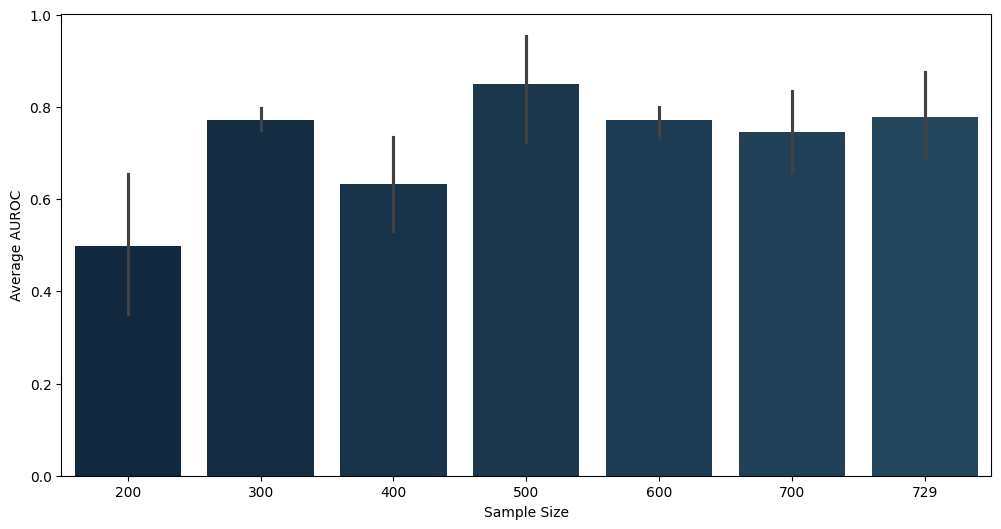

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import cmocean


plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=linePlotDf,
    x='Sample Size',
    y='AUROC Score',
    # hue='Data Window',
    palette=sns.color_palette("cmo.diff", n_colors=80),
    # height=6,
    # aspect=1.5,
    # lowess=True,
    # scatter_kws={"s": 0},
    )
ax.set(xlabel='Sample Size')
ax.set(ylabel='Average AUROC')
plt.show()
